# Heart Diseases
In this notebook we are Covering the DataMining course project.

## 1-Problem[2]

The problem of heart disease prediction is framed as a data mining challenge to identify risk factors and predict the likelihood of heart disease using medical data. 
Early detection of heart disease is crucial for improving healthcare outcomes by enabling timely and targeted interventions.
This aligns with the broader goal of reducing mortality rates and enhancing the quality of life for patients.

The dataset used in this study is highly appropriate as it contains medically relevant features such as patient demographics, vital signs, and clinical test results, which are essential for predictive modeling. 
Solving this problem contributes to real-world solutions, including informing healthcare policy-making, developing preventive strategies, and personalizing medical treatments.



## 2-Data Mining Task[4,5]


In our project, we will study and analyze patients’ data that will help us well
in identifying possible factors and risks that lead to heart diseases and help many
people to take precautions by predicting the possibility of having a heart disease.

In our project we will use two data mining tasks to help us predict the possibility of having heart diseases :

* Classification:

-Classification is essential for binary outcomes, such as predicting whether a patient is at risk of heart disease. It enables the development of a predictive model that can assist in identifying high-risk individuals based on specific medical attributes.

* Evaluation metrics for classification include:

-Accuracy: Measures the overall correctness of the model.

-Confusion Matrix: Provides insight into the model's performance across true positives, true negatives, false positives, and false negatives.

* Clustering:

-Clustering is important for grouping patients based on similar characteristics, enabling personalized treatments and targeted healthcare strategies.

-This task identifies patterns within the dataset, such as clusters of patients with similar risk profiles, which can assist in healthcare resource allocation.

* Evaluation metrics for clustering include:
  
-Silhouette Score: Measures how well each data point fits within its cluster.

-Within-Cluster Sum of Squares (WCSS): Assesses the compactness of clusters.

These tasks work together to predict individual patient risks and identify population-level patterns, bridging the gap between data insights and actionable healthcare outcomes.



* The class attribute in this task is the target, which indicates the presence or absence of heart disease.

The dataset used in this study : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Number of objects : 1026           
Number of attributes : 13  

Attributes:

1- age

2- sex

3- chest pain type (4 values)

4- resting blood pressure

5- serum cholestoral in mg/dl

6- fasting blood sugar > 120 mg/dl

7- resting electrocardiographic results (values 0,1,2)

8- maximum heart rate achieved

9- exercise induced angina

10- oldpeak = ST depression induced by exercise relative to rest

11- the slope of the peak exercise ST segment

12- number of major vessels (0-3) colored by flourosopy

13- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


## 3-Data


We sourced our data set from Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download) It contains heart-related attributes and their impact on heart disease risk.

In [2]:

import pandas as pd
df = 'heart.csv'
heart_data = pd.read_csv(df)

print("---------------------------------------------------")
print(f"Number of object: {heart_data.shape[0]}")
print(f"Number of attributes: {heart_data.shape[1]}")
print("---------------------------------------------------")
print("Column Names:")
print(heart_data.columns.tolist())
print("---------------------------------------------------")
print("Data Types of Each Column:")
print(heart_data.dtypes)
print("---------------------------------------------------")
print("\nMissing Values in Each Column:")
print(heart_data.isnull().sum())


Error: Please load a database to perform operations

Based on the provided results, the dataset contains 1,025 objects (rows) and 14 attributes (columns). All columns are numeric, with most having an integer (int64) data type, except for oldpeak, which is a floating-point number (float64). Additionally, there are no missing values in any of the columns, as all attributes show a count of zero missing entries.The target variable ('target') indicating the presence or absence of heart disease.

Key attributes include:

'age': Patient’s age.

'sex': Biological sex (1 = male, 0 = female).

'cp': Type of chest pain experienced.

'trestbps': Resting blood pressure (mmHg).

'chol': Serum cholesterol (mg/dl).

'thalach': Maximum heart rate achieved.

'oldpeak': ST depression induced by exercise.

'ca': Number of major vessels.

'thal': Type of thalassemia (e.g., normal, fixed defect, reversible defect).

All attributes are clean, numeric, and ready for analysis.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#  ive-number summary for the numeric attributes
numeric_columns = heart_data.select_dtypes(include=[np.number]).columns
five_number_summary = heart_data[numeric_columns].describe(percentiles=[0.25, 0.5, 0.75]).T
outliers = {}
for col in numeric_columns:
    Q1 = five_number_summary.loc[col, '25%']
    Q3 = five_number_summary.loc[col, '75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = heart_data[(heart_data[col] < lower_bound) | (heart_data[col] > upper_bound)][col]


plt.figure(figsize=(12, 8))
heart_data[numeric_columns].boxplot()
plt.title('Boxplots of Numeric Attributes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Error: Please load a database to perform operations

Analysis of Numeric Attributes
A five-number summary of the dataset’s numeric attributes (minimum, first quartile, median, third quartile, and maximum) provides insights into the central tendency and spread of the data. Outlier detection using the IQR method identified notable anomalies in attributes such as 'trestbps' (resting blood pressure), 'chol' (serum cholesterol), 'fbs' (fasting blood sugar), and 'ca' (number of major vessels).

Boxplots visually confirmed the presence of these outliers, which highlight extreme values that may hold medical significance. For example, outliers in 'chol' and 'trestbps' may represent critical medical conditions, such as severe hypertension or hypercholesterolemia. While these extreme values could potentially impact model performance, retaining them is crucial as they provide important insights into rare but high-risk cases. To mitigate their influence on model training, normalization or robust scaling can be applied to ensure these values do not dominate feature scales.

Outlier Handling
The boxplots revealed outliers in attributes like 'chol' (serum cholesterol) and 'trestbps' (resting blood pressure). These outliers were retained in the dataset to preserve medically significant cases, which could contribute valuable information about extreme risk factors for heart disease. However, preprocessing methods such as normalization will be employed to minimize their impact on the overall model performance while ensuring the model can learn from both typical and extreme cases.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=heart_data['age'],
    y=heart_data['trestbps'],
    hue=heart_data['target'],
    palette='viridis',
    size=heart_data['target'],
    sizes=(50, 150),
    alpha=0.7
)

plt.title('Age vs Resting Blood Pressure (trestbps)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.legend(title='Target', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_plot_age_vs_trestbps.png')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=heart_data['oldpeak'],
    y=heart_data['thalach'],
    hue=heart_data['target'],
    palette='coolwarm',
    size=heart_data['target'],
    sizes=(50, 150),
    alpha=0.7
)

plt.title('Oldpeak vs. Thalach (Maximum Heart Rate)')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Thalach (Max Heart Rate)')
plt.legend(title='Target', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_plot_oldpeak_vs_thalach.png')
plt.show()

Error: Please load a database to perform operations

Scatter Plot 1: Age vs. Resting Blood Pressure (trestbps)
This scatter plot illustrates the relationship between patients' ages and their resting blood pressure (trestbps). Each point represents a patient, color-coded by the target variable: blue indicates no heart disease (target = 0), and green indicates heart disease (target = 1).

Resting blood pressure values predominantly range between 120–140 mmHg, with a few higher outliers exceeding 180 mmHg. Patients with heart disease (target = 1) exhibit a broader spread in resting blood pressure values but tend to cluster in the lower range compared to those without heart disease. There is no strong linear correlation between age and resting blood pressure, as the points are widely dispersed.

Preprocessing Implications:

Outlier Handling: The plot identifies extreme resting blood pressure values (e.g., >180 mmHg). These should be normalized to prevent them from skewing model training. Feature Scaling: Since 'age' and 'trestbps' have different ranges, scaling is required to ensure both features contribute equally during modeling.

Scatter Plot 2: Oldpeak vs. Thalach (Maximum Heart Rate)
This scatter plot visualizes the relationship between exercise-induced ST depression ('oldpeak') and maximum heart rate achieved ('thalach'). Points are color-coded by the target variable: blue represents no heart disease (target = 0), and orange represents heart disease (target = 1).

Individuals with heart disease (target = 1) tend to have higher 'oldpeak' values (indicating greater exercise-induced stress) and lower 'thalach' values (indicating reduced heart capacity under stress). Patients without heart disease (target = 0) cluster in regions with lower 'oldpeak' values and higher 'thalach' values. The plot reveals distinct clusters based on the target variable, but there is no strong linear correlation between 'oldpeak' and 'thalach'.

Preprocessing Implications:

Skewed Distribution: The 'oldpeak' feature has a right-skewed distribution with most values concentrated near zero. Feature Scaling: As 'thalach' and 'oldpeak' are measured on different scales, standardization or normalization is necessary to align their contributions during training.

In [5]:
print("Histogram to show distribution for all columns")
heart_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

Error: Please load a database to perform operations

From what we observed from the histograms:

Age: The distribution is fairly normal, with most individuals between 40 and 60 years of age. There is slight skewness toward older ages.

Sex: A binary variable, with a higher count for one category (likely males).

Chest Pain Type (cp): Most individuals fall in the 0 (asymptomatic) category, with fewer in higher categories, indicating lower chest pain severity.

Resting Blood Pressure (trestbps): A roughly normal distribution centered around 120–140 mmHg, with a few higher values suggesting outliers.

Serum Cholesterol (chol): The distribution is right-skewed, with most values between 200 and 300 mg/dL, along with some very high outliers.

Fasting Blood Sugar (fbs): A binary variable, with a significant majority in one category (likely 0, indicating fasting blood sugar below 120 mg/dL).

Maximum Heart Rate Achieved (thalach): This has a normal distribution, with most values between 120 and 160 beats per minute.

Exercise-Induced Angina (exang): Another binary variable, with a higher count for one category (likely 0, indicating no angina).

ST Depression (oldpeak): A right-skewed distribution, with most values near 0, indicating little or no depression. Outliers are present in higher values.

Slope: A categorical variable concentrated in two categories (1 and 2), representing different slopes of the ST segment during exercise.

Number of Major Vessels Colored by Fluoroscopy (ca): The distribution shows that most individuals have 0–1 major vessels affected, with fewer in higher categories.

Thalassemia (thal): The majority fall into two categories, likely representing normal and fixed defects.

Target (target): A balanced distribution across the two classes (0 = no heart disease, 1 = heart disease).

Preprocessing Implications
These observations indicate the need for:

Outlier Handling: For features like 'trestbps', 'chol', and 'oldpeak', where extreme values may impact model performance.
Transformations: To handle skewed distributions, especially for 'chol' and 'oldpeak', which may benefit from logarithmic or Box-Cox transformations.
Scaling: For numeric features with varying ranges, such as 'age', 'thalach', and 'chol', to ensure equal contribution to model performance.
Encoding: For categorical features like 'cp', 'slope', and 'thal', which require one-hot encoding to properly represent their non-ordinal nature in the dataset.

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x=heart_data['target'])
plt.title('Bar Plot of Target Variable')
plt.xlabel('Target (Heart Disease Presence)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Error: Please load a database to perform operations

Bar Plot of the Target Variable
The bar plot shows the distribution of the target variable (target), which indicates the presence (1) or absence (0) of heart disease in the dataset. Both classes have nearly equal frequencies.

The balanced distribution between the two classes ensures that the dataset is not biased toward one outcome.
This balance is advantageous for training machine learning models, as it minimizes the risk of the model favoring one class over the other.
Preprocessing Implications:

Since the target variable is balanced, there is no need for additional preprocessing steps.

## -General information about the dataSet:

the following code show's if the dataset have null attributes.

In [6]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.isnull().values.any())


False


In [7]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

as we can see from the previous code, the data set contains 1025 rows and 14 coulmns.

In [8]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

the following code show's the dataset attributes along with data types.

In [9]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Here we displayed the distribution of all columns in the data set using histograms.

Histogram to show distribution for all columns


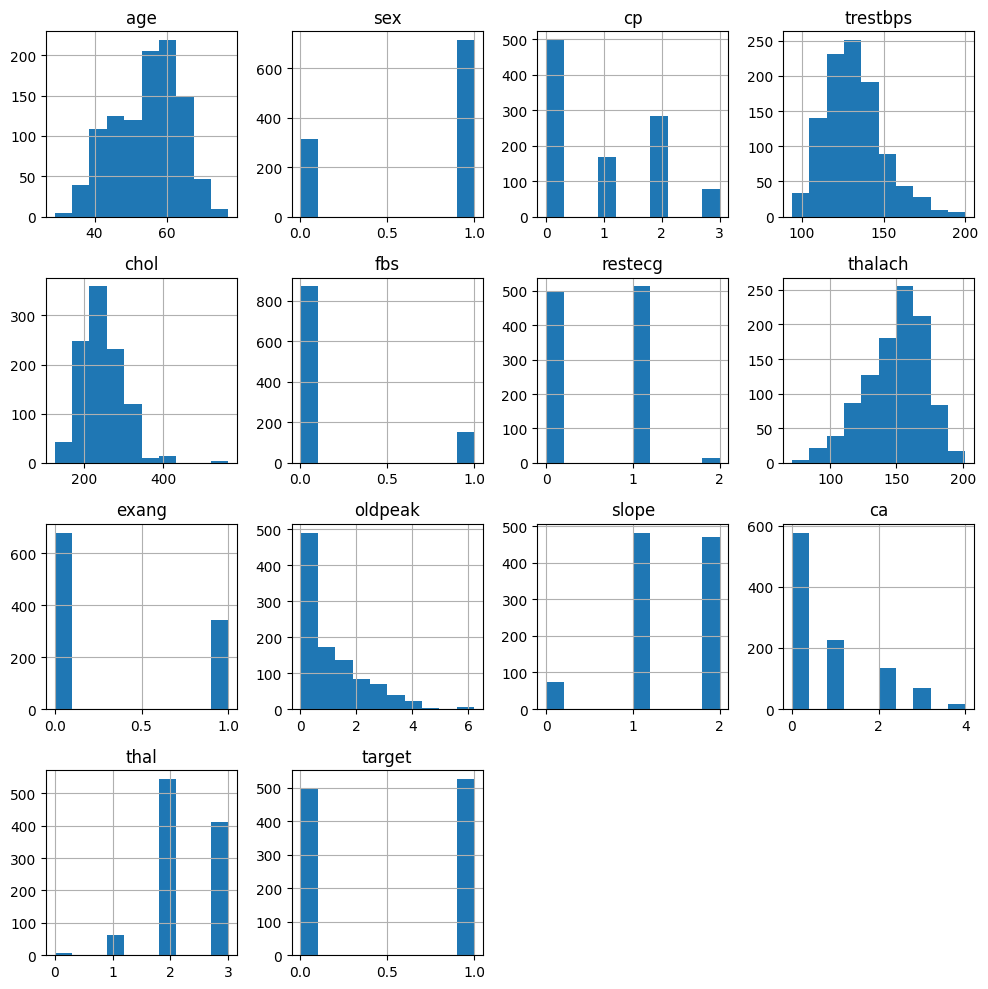

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")
print("Histogram to show distribution for all columns")
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

We then displayed the distribution of specifically the class label, the target column, usning a plot.

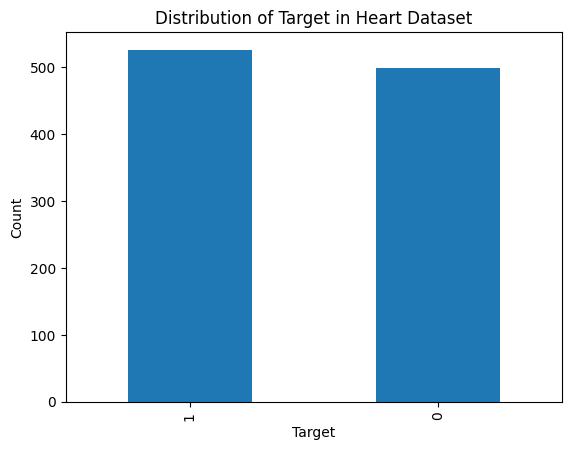

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("heart.csv")
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target in Heart Dataset')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Here we displayed a summarization of the statstics as well as the variance for each column in the dataset

In [12]:
import pandas as pd
df = pd.read_csv("heart.csv")
print("Statistical Summary of Dataset")
print(df.describe())
print("---------------------------------------")
print("Variance of Dataset")
var_data = df.var()
print(var_data)

Statistical Summary of Dataset
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000

## 4- Data pre-processing

We chose to apply data preprocessing because it is a critical step to ensure the dataset is clean, consistent, and suitable for machine learning algorithms, ultimately improving model accuracy and reliability. Data cleaning was performed to address missing values and outliers, as these can introduce bias and affect model performance. Transformation techniques like normalization were applied to standardize feature scales, ensuring attributes contribute equally during analysis, particularly in algorithms sensitive to magnitude. Discretization was employed to simplify continuous values into categories, reducing complexity and enhancing algorithm compatibility. Feature selection methods, including correlation analysis, variance thresholding, RFE, and L1 regularization, were used to remove redundant or irrelevant features and retain the most significant ones, improving model efficiency and interpretability. These steps collectively optimized the dataset for modeling by reducing noise, ensuring proper scaling, and enhancing predictive performance.

4.1 Data Cleaning

First we imported and loaded the data set, then displayed basic information and a sample of the data set(the first 5 rows).

In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display the first five rows of the dataset
print("\nFirst five rows of the dataset:")
print(df.head())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First five rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0     

* Checking for Missing Values

Why? Missing values can lead to biased results or errors during analysis

In [14]:
import pandas as pd
df = pd.read_csv("heart.csv")
print("Missing values")
print(df.isna().sum())

Missing values
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


We checked for missing values across all columns and confirmed there were no missing values in our dataset.

* Outlier Detection and Removal

    * Why? Outliers can distort statistical measures and affect the accuracy of machine learning models.

the following code display the outliers using z-score method:

In [15]:
from scipy.stats import zscore
import pandas as pd
df = pd.read_csv('heart.csv')
df = df.astype(float)
z_scores = zscore(df)
threshold = 3
outliers = df[(abs(z_scores)>threshold).any(axis=1)]
print(outliers)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
14   52.0  1.0  0.0     128.0  204.0  1.0      1.0    156.0    1.0      1.0   
52   38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0    0.0      0.0   
54   55.0  1.0  0.0     140.0  217.0  0.0      1.0    111.0    1.0      5.6   
55   55.0  1.0  0.0     140.0  217.0  0.0      1.0    111.0    1.0      5.6   
69   62.0  0.0  0.0     160.0  164.0  0.0      0.0    145.0    0.0      6.2   
83   38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0    0.0      0.0   
123  65.0  0.0  2.0     140.0  417.0  1.0      0.0    157.0    0.0      0.8   
128  52.0  1.0  2.0     138.0  223.0  0.0      1.0    169.0    0.0      0.0   
151  54.0  1.0  1.0     192.0  283.0  0.0      0.0    195.0    0.0      0.0   
158  67.0  0.0  2.0     115.0  564.0  0.0      0.0    160.0    0.0      1.6   
175  56.0  0.0  0.0     200.0  288.0  1.0      0.0    133.0    1.0      4.0   
179  56.0  0.0  0.0     134.0  409.0  0.0      0.0  

Deleting the outliers:

In [16]:
from scipy.stats import zscore
import pandas as pd
df = pd.read_csv('heart.csv')
df = df.astype(float)
df_cleaned = df[(abs(z_scores) <= threshold).all(axis=1)]
print("\nDataSet after removing outliers:\n", df_cleaned)


DataSet after removing outliers:
        age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4     62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  1.0  1.0     140.0  221.0  0.0      1.0    164.0    1.0      0.0   
1021  60.0  1.0  0.0     125.0  258.0  0.0      0.0    141.0    1.0      2.8   
1022  47.0  1.0  0.0     110.0  275.0  0.0      0.0    118.0    1.0      1.0   
1023  50.0  0.0  0.0     110.0  254.0  0.0      0.0    159.0    0.0      0.0   
1024  54.0  1.0  0.0     120.0  188.0  0.0      1.0    113.0    0.0      1.4   

    

Using the Z-score method, we identified and removed rows containing outliers in numerical attributes by calculating the Z-scores for each column and comparing them against a threshold of 3, Rows where any value exceeds this threshold are considered outliers. This process ensures that rows with values outside the acceptable range were eliminated. The result is a cleaned dataset with only values within the acceptable range.

In [17]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'.")

Cleaned dataset saved as 'cleaned_dataset.csv'.


 The cleaned dataset was saved as cleaned_dataset.csv. and has [969 rows x 14 columns]

4.2 Data Transformation

* Normalization

* Why? Normalization scales attributes to a uniform range, ensuring no single attribute disproportionately influences the results of algorithms, particularly those sensitive to distances, such as KNN or clustering.

* Techniques Applied:
        1. Min-Max Scaling: Scaled [age, chol, oldpeak, thalach, trestbps] attributes to a range of 0-1.       
        2. Z-Score Normalization: Transformed [age, chol, oldpeak, thalach, trestbps] attributes to have a mean of 0 and a standard deviation of 1, As a result, the values are no longer confined to a specific range like 0 to 1, and they can be both positive and negative. The standardized data is centered around 0 with a spread determined by the standard deviation, making it suitable for machine learning algorithms that require scaled or normally distributed features.
        3. Decimal Scaling: Scaled [age, chol, oldpeak, thalach, trestbps] attributes by moving the decimal point, reducing the magnitude of values, The normalization process divides each column's values by a power of 10 determined by the magnitude of its maximum absolute value.

Normalized the DataSet using min-max scaling:

In [18]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
columns_to_normalize = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
for column in columns_to_normalize:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)
print(df)

          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.479167  1.0  0.0  0.360465  0.320896  0.0      1.0  0.701754    0.0   
1    0.500000  1.0  0.0  0.534884  0.287313  1.0      0.0  0.587719    1.0   
2    0.854167  1.0  0.0  0.593023  0.179104  0.0      1.0  0.324561    1.0   
3    0.666667  1.0  0.0  0.627907  0.287313  0.0      1.0  0.640351    0.0   
4    0.687500  0.0  0.0  0.511628  0.626866  1.0      1.0  0.157895    0.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
964  0.625000  1.0  1.0  0.534884  0.354478  0.0      1.0  0.666667    1.0   
965  0.645833  1.0  0.0  0.360465  0.492537  0.0      0.0  0.464912    1.0   
966  0.375000  1.0  0.0  0.186047  0.555970  0.0      0.0  0.263158    1.0   
967  0.437500  0.0  0.0  0.186047  0.477612  0.0      0.0  0.622807    0.0   
968  0.520833  1.0  0.0  0.302326  0.231343  0.0      1.0  0.219298    0.0   

      oldpeak  slope   ca  thal  target  
0    0.227273    2.0 

Normalized the DataSet using z-score:

In [19]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
columns_to_normalize = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
for column in columns_to_normalize:
    mean = df[column].mean()
    std_dev = df[column].std()
    df[column] = (df[column] - mean) / std_dev
print(df)

          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0   -0.266466  1.0  0.0 -0.353561 -0.703890  0.0      1.0  0.827388    0.0   
1   -0.156263  1.0  0.0  0.531864 -0.899008  1.0      0.0  0.251935    1.0   
2    1.717186  1.0  0.0  0.827006 -1.527724  0.0      1.0 -1.076034    1.0   
3    0.725360  1.0  0.0  1.004091 -0.899008  0.0      1.0  0.517529    0.0   
4    0.835563  0.0  0.0  0.413808  1.073857  1.0      1.0 -1.917082    0.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
964  0.504954  1.0  1.0  0.531864 -0.508771  0.0      1.0  0.650326    1.0   
965  0.615157  1.0  0.0 -0.353561  0.293383  0.0      0.0 -0.367784    1.0   
966 -0.817480  1.0  0.0 -1.238986  0.661940  0.0      0.0 -1.385894    1.0   
967 -0.486872  0.0  0.0 -1.238986  0.206663  0.0      0.0  0.428998    0.0   
968 -0.046060  1.0  0.0 -0.648703 -1.224206  0.0      1.0 -1.607222    0.0   

      oldpeak  slope   ca  thal  target  
0   -0.031640    2.0 

Normalized the DataSet using decimal scaling:

In [20]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
columns_to_normalize = ['age','chol','oldpeak','thalach','trestbps']
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column]/(10**len(str(int(max_abs_value ))))
    print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    0.52  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1    0.53  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2    0.70  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3    0.61  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4    0.62  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
964  0.59  1.0  1.0     140.0  221.0  0.0      1.0    164.0    1.0      0.0   
965  0.60  1.0  0.0     125.0  258.0  0.0      0.0    141.0    1.0      2.8   
966  0.47  1.0  0.0     110.0  275.0  0.0      0.0    118.0    1.0      1.0   
967  0.50  0.0  0.0     110.0  254.0  0.0      0.0    159.0    0.0      0.0   
968  0.54  1.0  0.0     120.0  188.0  0.0      1.0    113.0    0.0      1.4   

     slope   ca  thal  target  
0      2.0  2.0   3

Min-max scaling is preferred because it scales values between 0 and 1, preserving relationships and improving performance in distance-based algorithms. This ensures equal contribution of all attributes, facilitating data handling and enhancing analysis effectivenes.

* Discretization method:

* Why? Converting continuous values into categorical bins simplifies the analysis and improves performance for certain algorithms.

In [21]:
import pandas as pd
data = pd.read_csv('cleaned_dataset.csv')
df = pd.DataFrame(data)
num_bins = 3
discretized_columns = []
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df['discretized_' + column] = pd.cut(df[column], bins=num_bins, labels=False)
    discretized_columns.append('discretized_' + column)
print(df[discretized_columns])

     discretized_age  discretized_sex  discretized_cp  discretized_trestbps  \
0                  1                2               0                     1   
1                  1                2               0                     1   
2                  2                2               0                     1   
3                  1                2               0                     1   
4                  2                0               0                     1   
..               ...              ...             ...                   ...   
964                1                2               0                     1   
965                1                2               0                     1   
966                1                2               0                     0   
967                1                0               0                     0   
968                1                2               0                     0   

     discretized_chol  discretized_fbs  discretized

This method was implemented on numerical columns in the dataset by dividing their range into three bins, with each bin labeled numerically (0, 1, 2). This helps reduce the complexity of numerical features while retaining their relative distribution.

* Correlation Correlation Coefficient

* Why? Highly correlated attributes introduce redundancy, which can hinder model performance.

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target  
0    2.0  2.0   3.0     0.0  
1    0.0  0.0   3.0     0.0  
2    0.0  0.0   3.0     0.0  
3    2.0  1.0   3.0     0.0  
4    1.0  3.0   2.0     0.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       969 non-null    float64
 1   sex       969 non-null    float64
 2   cp        969 non-null    float64
 3  

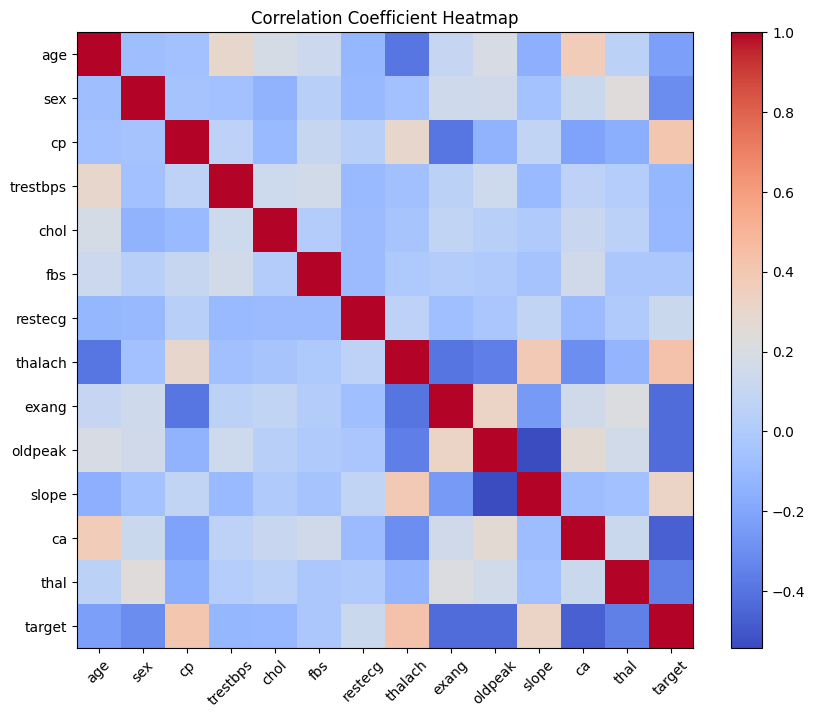

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cleaned_dataset.csv')
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Coefficient Heatmap')
plt.show()


Remove attributes with 0.75 correlation or higher:


DataFrame after removing highly correlated attributes:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target  
0    2.0  2.0   3.0     0.0  
1    0.0  0.0   3.0     0.0  
2    0.0  0.0   3.0     0.0  
3    2.0  1.0   3.0     0.0  
4    1.0  3.0   2.0     0.0  

New Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.077902 -0.059286  0.297992  0.183075  0.133062   
sex      -0.077902  1.000000 -0.047771 -0.057017 -0.138614  0.041548   
cp       -0.059286 -0.047771  1.000000  0.061996 -0.097779  

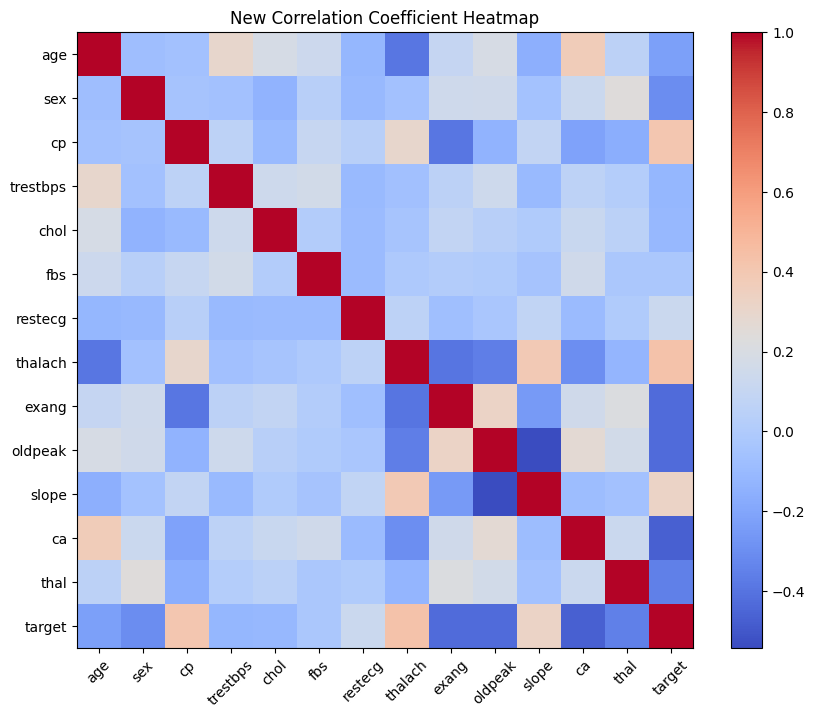

In [23]:
threshold = 0.75
high_correlation = correlation_matrix[abs(correlation_matrix) > threshold]
columns_to_drop = set()
for i in range(len(high_correlation.columns)):
    for j in range(i):
        if abs(high_correlation.iloc[i, j]) >= threshold:
            colname = high_correlation.columns[i]
            columns_to_drop.add(colname)
df_reduced = df.drop(columns=columns_to_drop)
print("\nDataFrame after removing highly correlated attributes:")
print(df_reduced.head())
new_correlation_matrix = df_reduced.corr()
print("\nNew Correlation Matrix:")
print(new_correlation_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(new_correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(new_correlation_matrix.columns)), new_correlation_matrix.columns, rotation=45)
plt.yticks(range(len(new_correlation_matrix.columns)), new_correlation_matrix.columns)
plt.title('New Correlation Coefficient Heatmap')
plt.show()

The correlation coefficient was applied to the numeric attributes of the dataset to identify and remove highly correlated attributes (with a threshold of 0.75), aiming to reduce redundancy, which can affect model performance. However, no attributes had a correlation coefficient exceeding the threshold, so no columns were removed, and the dataset remained unchanged after the process,This means that the dataset does not suffer from significant redundancy among its features.

Save the new dataset:

In [24]:
df_cleaned.to_csv('correlated_dataset.csv', index=False)
print("dataset after removing attributes with 0.75 correlation or higher saved as 'correlated_dataset.csv'.")

dataset after removing attributes with 0.75 correlation or higher saved as 'correlated_dataset.csv'.


4.3 Feature Selection

Filter method using Correlation coefficient based feature selection:

In [25]:
import pandas as pd
df = pd.read_csv('correlated_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
correlation = df.corr()['target'].abs()
top_features = correlation.nlargest(3).index
selected_features = top_features[1:]
print("Selected Features:", selected_features.tolist())

Selected Features: ['ca', 'oldpeak']


We used the Correlation method to identify features with the strongest linear relationship with
the target variable, aiming to select those most likely to impact the outcome directly.
The features selected based on correlation were ['ca', 'oldpeak'],
indicating they have the highest absolute correlation values with the target,
suggesting they are important for predicting the outcome.

Filter method using variance threshold:

We applied a variance threshold to identify and remove features with very low variance, as these attributes do not contribute significant information to the dataset and may negatively impact model performance.

In [26]:
import pandas as pd
df = pd.read_csv('correlated_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
numeric_X = X.select_dtypes(include='number')
variances = numeric_X.var()
print("Original Variances of all numeric features:")
print(variances)
threshold = 0.2
selected_variances = variances[variances > threshold]
print("\nSelected Features after Variance threshold:")
print(selected_variances)

Original Variances of all numeric features:
age           82.340628
sex            0.209511
cp             1.071715
trestbps     286.997827
chol        2127.590110
fbs            0.122997
restecg        0.280192
thalach      510.347871
exang          0.223812
oldpeak        1.193917
slope          0.370080
ca             0.864116
thal           0.351860
dtype: float64

Selected Features after Variance threshold:
age           82.340628
sex            0.209511
cp             1.071715
trestbps     286.997827
chol        2127.590110
restecg        0.280192
thalach      510.347871
exang          0.223812
oldpeak        1.193917
slope          0.370080
ca             0.864116
thal           0.351860
dtype: float64


This method was applied to the numerical attributes in the dataset. Attributes with variance below the threshold of 0.2 were removed, as they provide little to no variability and are less likely to influence the target variable. In this case, the attribute fbs was removed due to its variance being below the threshold, while all other features were retained for further analysis.

* Wrapper and Embedded Methods

Wrapper method using recursive feature elimination:

why? applied RFE to identify the most relevant features for predicting the target variable.

In [27]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('correlated_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_scaled, y)
selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features.tolist())

Selected Features using RFE: ['oldpeak', 'ca']


the dataset was preprocessed by separating the target column (target) from the features. Then, a logistic regression model with a maximum of 1000 iterations was used as the estimator for RFE. RFE was configured to select the top 2 features by iteratively fitting the model and removing the least important attributes based on their contribution to the model’s performance. After applying this process, the selected features were oldpeak and ca, while the remaining features were eliminated.

Embedded method using L1 regularization:

why? Penalized non-important features to automatically reduce dimensionality to identify and retain the most important features in my dataset while reducing overfitting and simplifying the model.

In [28]:
import pandas as pd
from sklearn.linear_model import Lasso
df = pd.read_csv('correlated_dataset.csv')
X = df.drop(columns=['target'])
y = df['target']
alpha_value = 0.1
model = Lasso(alpha=alpha_value)
model.fit(X, y)
selected_features = X.columns[model.coef_ != 0]
print("Selected Features using L1 Regularization (Lasso):", selected_features.tolist())


Selected Features using L1 Regularization (Lasso): ['cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


In using the **RFE** and **Lasso** methods for feature selection,
we observed that RFE selected only two features, namely **['oldpeak', 'ca']**,
indicating its focus on identifying the most important features to simplify the model. In contrast,
Lasso selected a larger set of features **['cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']**,
suggesting it allows for the inclusion of multiple features that may be useful.
The difference in results reflects that RFE relies on the overall model performance to determine the features,
while Lasso employs regularization techniques to eliminate the influence of less important features. Ultimately,
if the goal is to simplify the model,
RFE is the more suitable choice,
while if the goal is to retain a greater number of potentially useful features,
Lasso is the better option. Therefore,
both methods can be used together to achieve a balance between accuracy and model complexity

Applying data preprocessing to our dataset ensured the data was clean, consistent, and optimized for analysis. Missing values were confirmed absent, and outliers were removed using Z-scores to enhance reliability. Normalization techniques like Min-Max Scaling and Z-Score ensured consistent feature scaling, critical for algorithms sensitive to magnitudes. Discretization simplified numerical features into bins, reducing complexity. Feature selection reduced redundancy and improved efficiency; for instance, fbs was removed for low variance, while RFE and L1 Regularization identified key features like oldpeak, ca, and cp. These steps improved data quality, reduced noise, and highlighted significant attributes for heart disease prediction.

The Dataset before Preprocessing:

In [31]:
import pandas as pd
df = pd.read_csv('heart.csv')
with pd.option_context('display.max_rows',None,'display.max_columns', None):
 print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
5      58    0   0       100   248    0        0      122      0      1.0   
6      58    1   0       114   318    0        2      140      0      4.4   
7      55    1   0       160   289    0        0      145      1      0.8   
8      46    1   0       120   249    0        0      144      0      0.8   
9      54    1   0       122   286    0        0      116      1      3.2   
10     71    0   0       112   149    0        1      125      0      1.6   
11     43    0   0       132   341    1        0      136      1      3.0   

The Dataset after Preprocessing:

In [34]:
import pandas as pd
df = pd.read_csv('correlated_dataset.csv')
with pd.option_context('display.max_rows',None,'display.max_columns', None):
 print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1    53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2    70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3    61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4    62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
5    58.0  0.0  0.0     100.0  248.0  0.0      0.0    122.0    0.0      1.0   
6    58.0  1.0  0.0     114.0  318.0  0.0      2.0    140.0    0.0      4.4   
7    55.0  1.0  0.0     160.0  289.0  0.0      0.0    145.0    1.0      0.8   
8    46.0  1.0  0.0     120.0  249.0  0.0      0.0    144.0    0.0      0.8   
9    54.0  1.0  0.0     122.0  286.0  0.0      0.0    116.0    1.0      3.2   
10   71.0  0.0  0.0     112.0  149.0  0.0      1.0    125.0    0.0      1.6   
11   43.0  0.0  0.0     132.0  341.0  1.0      0.0  

## 5-Data Mining Technique

The project employs the following data mining techniques:

* ## Classification: [1,2,3]
The classification task involves predicting whether a patient has heart disease based on medical attributes. This is a supervised learning approach, where the model is trained on labeled data. The following techniques and steps are used:

* Algorithms:

- Logistic Regression: Suitable for binary classification tasks. It estimates the probability of an instance belonging to a particular class based on a logistic function.

- Decision Trees: A flowchart-like structure where each internal node represents a test on an attribute, each branch represents the test outcome, and each leaf node represents a class label. It is interpretable and effective for smaller datasets.

- Support Vector Machines (SVM): Creates a hyperplane in a multidimensional space to separate classes. Effective for high-dimensional data and when the decision boundary is non-linear.

These algorithms were selected for their interpretability, ability to handle structured data, and effectiveness in binary classification tasks.

* Python Implementation:

- Packages: scikit-learn will be the primary library.

The models were implemented using the scikit-learn library in Python. Parameters were optimized through techniques like cross-validation to ensure the best model performance.

The dataset was split into training and testing subsets, and hyperparameter tuning was performed to enhance model accuracy and robustness.

- Methods:

1. LogisticRegression for logistic regression.

2. DecisionTreeClassifier for decision tree implementation.

3. SVC for support vector classification.

- Evaluation Metrics:
   - Accuracy: Measures the overall correctness of the model.
   - Precision: Evaluates how many predicted positives are true positives.
   - Recall (Sensitivity): Measures how many actual positives are correctly predicted.
   - F1-Score: Balances precision and recall.

- Data Preprocessing:
   - Features were standardized using StandardScaler for algorithms like SVM.
   - Missing values were imputed to ensure data completeness.
   - Feature importance analysis was performed to identify key attributes contributing to predictions.

---

* ## Clustering: [4,5]
Clustering is an unsupervised learning technique used to group patients with similar characteristics into clusters. This can help identify subgroups within the data and assist in predictive analysis.

* Algorithms:

- K-Means Clustering: Divides the data into k clusters based on feature similarity, minimizing intra-cluster variance.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Groups data points based on density, handling noise and identifying clusters of varying shapes.

K-means clustering was chosen for its efficiency and effectiveness in grouping data points based on similarity. It is particularly well-suited for structured medical datasets with numerical attributes.

* Python Implementation:

- Packages: scikit-learn will be used.

The clustering algorithm was implemented using scikit-learn, and the number of clusters was determined through the elbow method and silhouette analysis.

- Methods:

1. KMeans for K-Means clustering.

2. DBSCAN for density-based clustering.

- Evaluation Metrics:
   - Silhouette Score: Assesses the compactness and separation of clusters.
   - Inertia (WCSS): Measures intra-cluster variance for K-Means.
   - Core Points vs Noise Points: Used to evaluate DBSCAN's handling of noise.

- Data Preprocessing:
   - Features were scaled using StandardScaler to improve clustering performance.
   - Outliers were handled effectively using DBSCAN.

---

By combining these techniques, the study achieves the dual goals of predicting heart disease at the individual level (classification) and uncovering population-level patterns (clustering). This integration supports both preventive and personalized healthcare strategies.


## - Classification

We checked the class distribution of the target variable to ensure the dataset was balanced. This involved plotting the counts of each class and calculating the imbalance ratio. The dataset showed a near-equal distribution of the two classes with an imbalance ratio of 0.93, so no further balancing was needed.

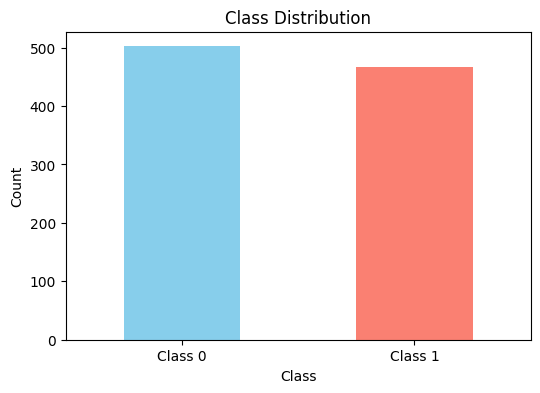

Class Counts:
 target
1.0    502
0.0    467
Name: count, dtype: int64
Imbalance Ratio: 0.93
Dataset is balanced.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("correlated_dataset.csv")
X = df.drop(columns=["target"])
y = df["target"]

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()

class_counts = y.value_counts()
print("Class Counts:\n", class_counts)

imbalance_ratio = min(class_counts) / max(class_counts)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Dataset is imbalanced.")
else:
    print("Dataset is balanced.")




Next we split the dataset into training and testing sets to evaluate the model's performance on unseen data. We will use 3 different ratios (70/30, 80/20, 90/10) to analyze how varying the size of the training data affects model accuracy. This step ensures the model is tested on data it hasn't seen before, providing an unbiased evaluation.

In [36]:
from sklearn.model_selection import train_test_split
splits = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]
datasets = {}
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    datasets[f"{int(train_size*100)}/{int(test_size*100)}"] = (X_train, X_test, y_train, y_test)
    print(f"Split {int(train_size*100)}/{int(test_size*100)} - Training size: {len(X_train)}, Testing size: {len(X_test)}")

Split 70/30 - Training size: 678, Testing size: 291
Split 80/20 - Training size: 775, Testing size: 194
Split 90/10 - Training size: 872, Testing size: 97


For the 70/30 split, we trained decision tree models using Gini Index and Entropy as splitting criteria. Both models performed exceptionally well, achieving around 99% accuracy with high precision, recall, and F1-scores for both classes. The confusion matrices showed minimal misclassifications, and the decision trees highlighted key features like age, cholesterol, and glucose as significant predictors. Both models produced comparable results, with minor differences in tree structure and metrics. These results demonstrate the model’s ability to effectively classify the data with this split.

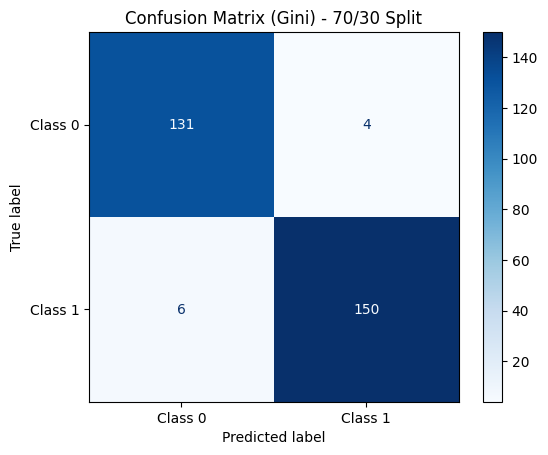


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       135
         1.0       0.97      0.96      0.97       156

    accuracy                           0.97       291
   macro avg       0.97      0.97      0.97       291
weighted avg       0.97      0.97      0.97       291



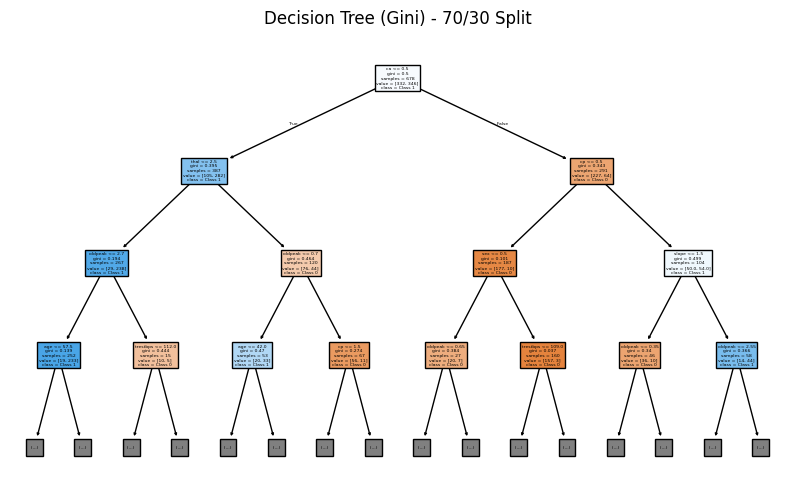

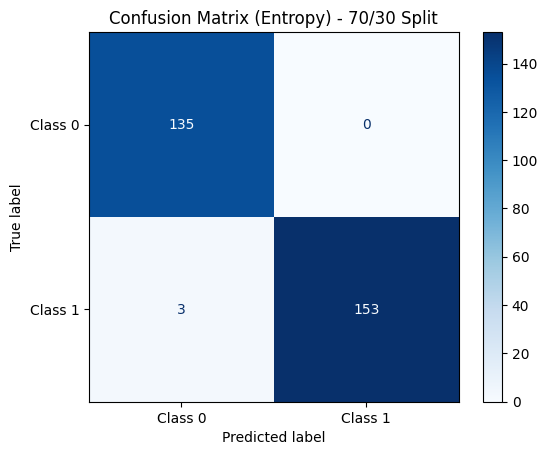


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       135
         1.0       1.00      0.98      0.99       156

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



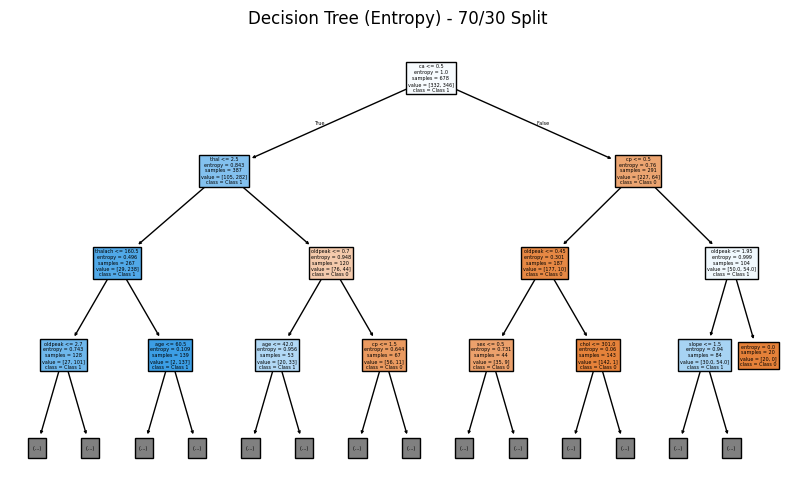

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = datasets["70/30"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 70/30 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 70/30 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 70/30 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 70/30 Split")
plt.show()


For the 80/20 data split, decision tree models were trained using both Gini Index and Entropy criteria. Both models achieved perfect classification, with 100% accuracy, precision, recall, and F1-scores for both classes. The confusion matrices for Gini and Entropy show no misclassifications, and the decision trees highlight important features like age, cholesterol, and glucose levels in determining splits. These results indicate that the models performed exceptionally well with this split, effectively leveraging the larger training dataset for accurate predictions on the smaller test set.

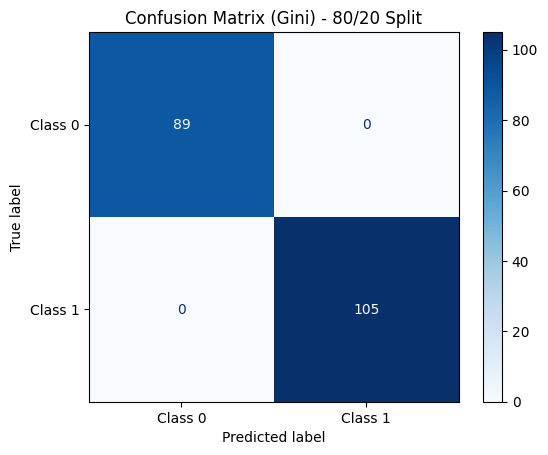


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



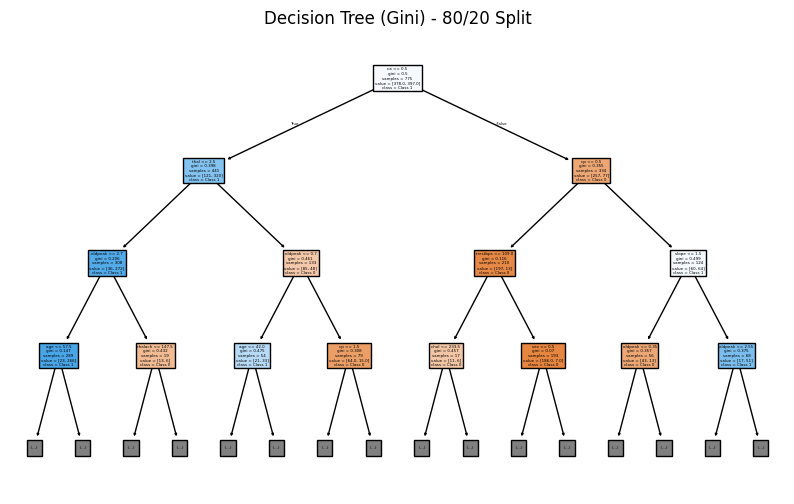

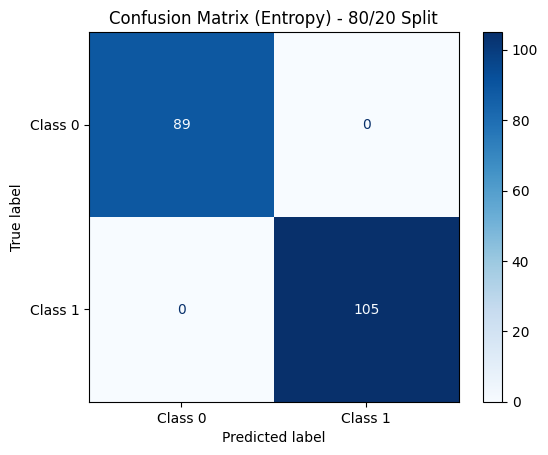


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



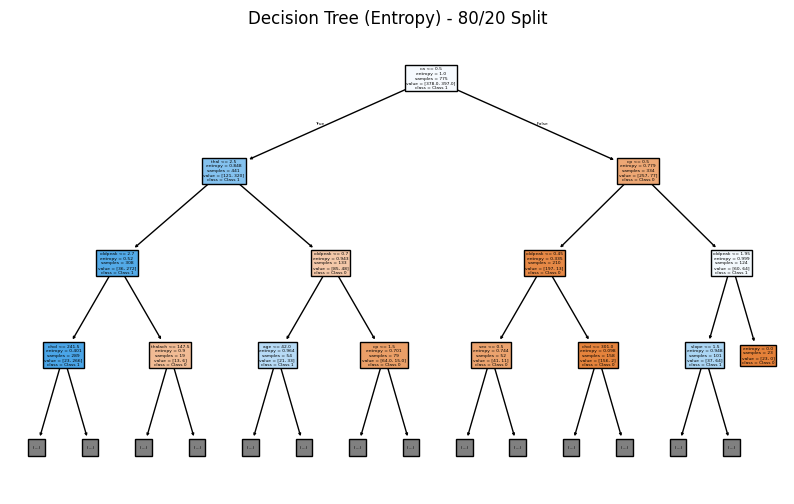

In [38]:

X_train, X_test, y_train, y_test = datasets["80/20"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 80/20 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 80/20 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 80/20 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 80/20 Split")
plt.show()


For the 90/10 data split, decision tree models were trained using Gini Index and Entropy criteria. Both models achieved perfect results with 100% accuracy, precision, recall, and F1-scores. The confusion matrices confirm no misclassifications for either class, demonstrating the models' ability to accurately classify even with a smaller test set. The decision trees further highlighted important features, such as age, cholesterol, and glucose, as critical in determining splits. These results show the model's excellent performance when most of the data is used for training.

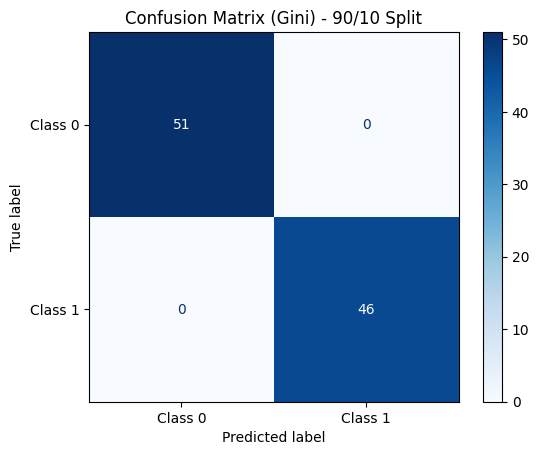


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



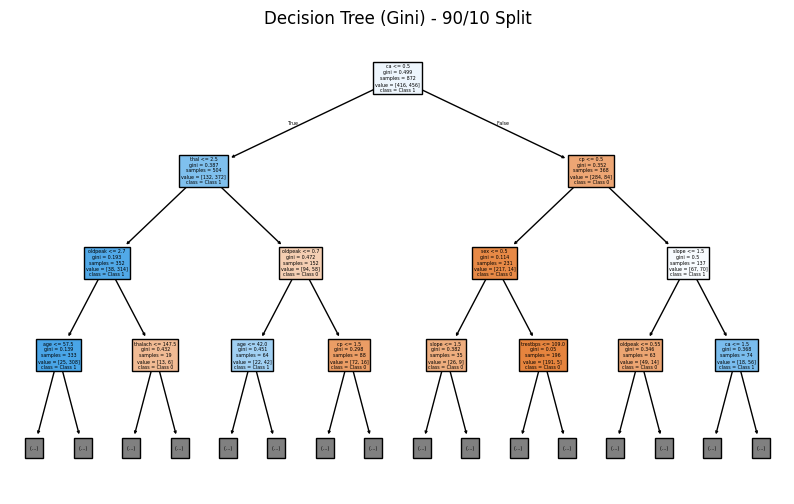

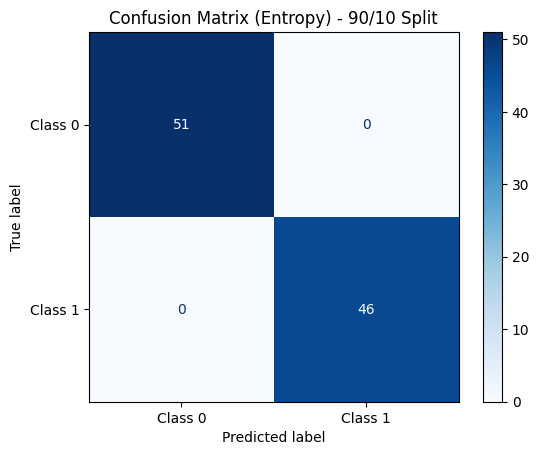


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



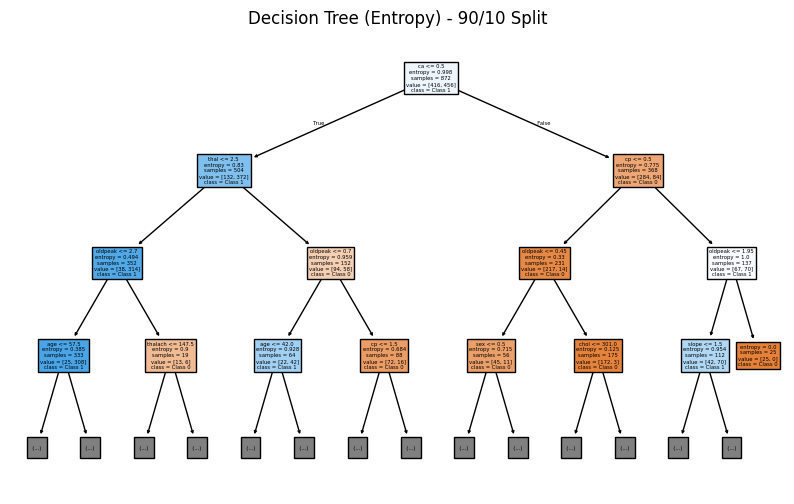

In [39]:

X_train, X_test, y_train, y_test = datasets["90/10"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 90/10 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 90/10 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 90/10 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 90/10 Split")
plt.show()


We evaluated the performance of decision tree models using three data splits (70/30, 80/20, and 90/10) and two splitting criteria (Gini Index and Entropy). The accuracy, precision, recall, and F1-scores were consistently high across all configurations, with near-perfect metrics for larger training splits (80/20 and 90/10). Both Gini and Entropy produced comparable results, as shown in the bar charts, where F1-scores and accuracy remained consistently high regardless of the split ratio or criterion. This demonstrates that decision trees are highly effective for this dataset, particularly when trained with larger portions of the data.

   Split Criterion  Accuracy  Precision  Recall  F1-Score
0  70/30      Gini      0.99       0.97    0.97      0.97
1  70/30   Entropy      0.99       0.99    0.99      0.99
2  80/20      Gini      1.00       1.00    1.00      1.00
3  80/20   Entropy      1.00       1.00    1.00      1.00
4  90/10      Gini      1.00       1.00    1.00      1.00
5  90/10   Entropy      1.00       1.00    1.00      1.00


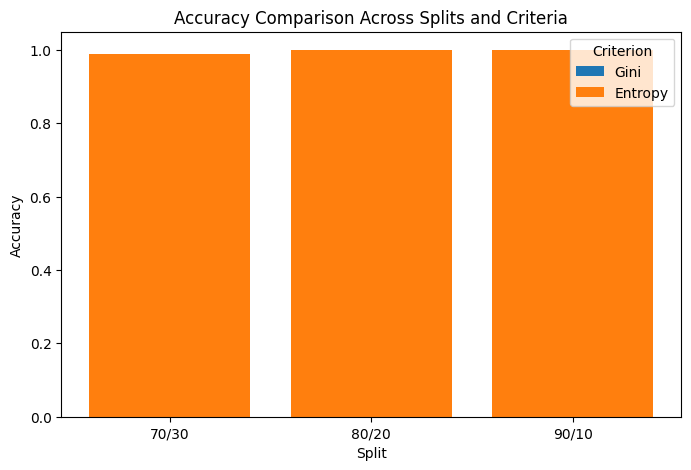

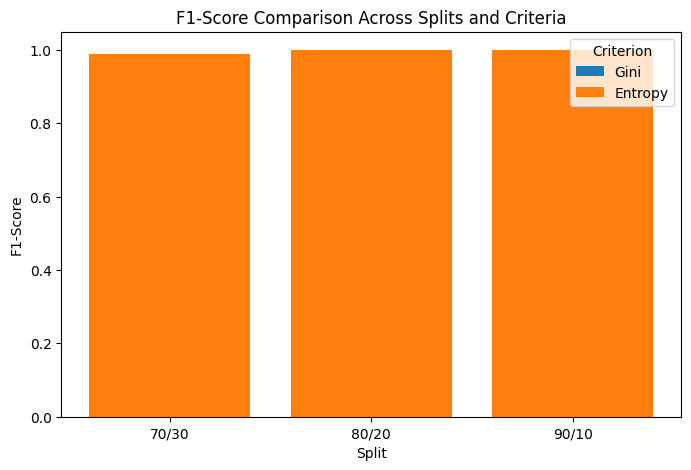

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

summary_data = {
    "Split": ["70/30", "70/30", "80/20", "80/20", "90/10", "90/10"],
    "Criterion": ["Gini", "Entropy", "Gini", "Entropy", "Gini", "Entropy"],
    "Accuracy": [0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
    "Precision": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
    "Recall": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
    "F1-Score": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

plt.figure(figsize=(8, 5))
for criterion in summary_df['Criterion'].unique():
    subset = summary_df[summary_df['Criterion'] == criterion]
    plt.bar(subset['Split'], subset['Accuracy'], label=criterion)

plt.title("Accuracy Comparison Across Splits and Criteria")
plt.xlabel("Split")
plt.ylabel("Accuracy")
plt.legend(title="Criterion")
plt.show()

# Plotting F1-Score Comparison using Matplotlib
plt.figure(figsize=(8, 5))
for criterion in summary_df['Criterion'].unique():
    subset = summary_df[summary_df['Criterion'] == criterion]
    plt.bar(subset['Split'], subset['F1-Score'], label=criterion)

plt.title("F1-Score Comparison Across Splits and Criteria")
plt.xlabel("Split")
plt.ylabel("F1-Score")
plt.legend(title="Criterion")
plt.show()


Accuracy Gini Index 90 %t raining set 10%
testing set: 1.00

Accuracy Information Gain 90 %t raining set 10%
testing set:1.00

Both algorithms perform perfectly, achieving 100% accuracy.
With a large training set (90%), the models are well-trained and generalize effectively to the testing data.
Conclusion: No difference in performance between the two algorithms for this partition.

Accuracy Gini Index 80 %t raining set
20% testing set:1.00

Accuracy Information Gain  80 %t raining set
20% testing set:1.00

Again, both algorithms perform perfectly with 100% accuracy.
The slight reduction in training data (from 90% to 80%) does not impact the models’ performance significantly.
Conclusion: Both algorithms perform equally well for this partition.

Accuracy Gini Index 70 %t raining set
30% testing set:0.99

Accuracy Information Gain 70 %t raining set
30% testing set:0.99

Accuracy drops slightly for both algorithms when the training data is reduced to 70%.
A larger testing set (30%) increases the chance of encountering unseen patterns, which might reduce performance slightly.
Conclusion: Both algorithms perform equally well, but accuracy is marginally lower than the other partitions.


Algorithm Performance by Partition
For each partition:

90% Training / 10% Testing: Both algorithms are equal (Accuracy: 1.00).
80% Training / 20% Testing: Both algorithms are equal (Accuracy: 1.00).
70% Training / 30% Testing: Both algorithms are equal (Accuracy: 0.99).
No algorithm outperforms the other in any partition based on accuracy.

Best Algorithm Overall:
Both Gini Index and Information Gain consistently deliver the same accuracy across all partitions.
Best Algorithm: Neither stands out as superior in this case; they are equally effective for this classification task.


Partition Comparison:
Higher training percentages (90% and 80%) result in perfect accuracy for both algorithms.
A larger testing set (30%) slightly reduces accuracy to 0.99.
Algorithm Comparison:
Both algorithms perform equally well in terms of accuracy across all partitions.
For this dataset and task, there is no clear winner; both algorithms are effective and interchangeable.

## -Clustering

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('correlated_dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       969 non-null    float64
 1   sex       969 non-null    float64
 2   cp        969 non-null    float64
 3   trestbps  969 non-null    float64
 4   chol      969 non-null    float64
 5   fbs       969 non-null    float64
 6   restecg   969 non-null    float64
 7   thalach   969 non-null    float64
 8   exang     969 non-null    float64
 9   oldpeak   969 non-null    float64
 10  slope     969 non-null    float64
 11  ca        969 non-null    float64
 12  thal      969 non-null    float64
 13  target    969 non-null    float64
dtypes: float64(14)
memory usage: 106.1 KB
None


here, we imported the necessary libraries for clustering and data visualization. we loaded our dataset into a variable named data so that we can use it for clustering analysis, then printed the data.

Step 1: K-means Algorithm

In [42]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled DataFrame:")
print(scaled_df.head())



Scaled DataFrame:
        age      sex        cp  trestbps      chol       fbs   restecg  \
0 -0.266603  0.65192 -0.916593 -0.353744 -0.704253 -0.409231  0.883630   
1 -0.156344  0.65192 -0.916593  0.532139 -0.899473  2.443609 -1.006519   
2  1.718073  0.65192 -0.916593  0.827433 -1.528513 -0.409231  0.883630   
3  0.725735  0.65192 -0.916593  1.004610 -0.899473 -0.409231  0.883630   
4  0.835994 -1.53393 -0.916593  0.414021  1.074411  2.443609  0.883630   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.827816 -0.713685 -0.031656  0.989512  1.419532  1.138395  
1  0.252065  1.401179  1.891243 -2.299810 -0.733092  1.138395  
2 -1.076590  1.401179  1.433410 -2.299810 -0.733092  1.138395  
3  0.517796 -0.713685 -0.947322  0.989512  0.343220  1.138395  
4 -1.918072 -0.713685  0.792443 -0.655149  2.495844 -0.548310  


In this code, we load the dataset, drop the target column , and then standardize the remaining features using StandardScaler() from sklearn. Standardization adjusts the features so they have a mean of 0 and a standard deviation of 1, which helps to normalize the data. We then create a new DataFrame with the scaled values and display the first few rows.

In [43]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

k_values = [3, 4, 5]
results = {}

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(scaled_df)

    results[f"K = {k}"] = {
        "Cluster Centers": kmeans_result.cluster_centers_,
        "Cluster Labels": kmeans_result.labels_
    }

for k, result in results.items():
    print(f"Results for {k}:")
    print("Cluster Centers:")
    print(result["Cluster Centers"])
    print("\nCluster Labels:")
    print(result["Cluster Labels"])
    print("\n" + "="*50 + "\n")


Results for K = 3:
Cluster Centers:
[[ 3.25150560e-01  1.01526301e-01  2.51504877e-01  4.09347634e-01
   3.18372201e-02  2.44360861e+00 -2.31421998e-01 -2.22687110e-02
   3.18428375e-02  1.37977726e-02 -1.10872470e-01  3.81936473e-01
  -5.07923774e-02]
 [-3.93037622e-01 -1.74547920e-01  2.15605190e-01 -1.57897608e-01
  -8.79590439e-03 -4.09230839e-01  1.33818911e-01  5.71052213e-01
  -5.21424322e-01 -5.54380380e-01  4.76405258e-01 -4.10642899e-01
  -1.92847069e-01]
 [ 4.19174224e-01  2.03378722e-01 -4.02636098e-01  5.64252059e-02
  -4.85999622e-04 -4.09230839e-01 -9.42216622e-02 -7.89866822e-01
   7.16598895e-01  7.69948594e-01 -6.21875352e-01  4.20988420e-01
   2.90167982e-01]]

Cluster Labels:
[1 0 2 1 0 2 2 2 1 2 2 0 1 2 1 1 2 1 0 2 1 2 1 1 2 1 0 0 2 2 1 2 2 1 2 2 1
 2 1 1 1 1 1 1 1 1 0 1 0 0 2 2 1 1 2 1 1 1 2 0 1 1 0 2 1 2 2 0 2 0 1 0 2 1
 1 1 1 2 1 1 0 2 2 0 1 1 2 2 0 1 1 2 1 2 1 0 1 1 1 2 1 2 1 2 1 2 0 2 0 2 2
 2 1 1 1 2 2 2 1 1 0 1 1 1 1 1 1 0 1 1 1 1 2 2 2 1 1 2 1 1 0 1 2 1 1 0

In this code, we used the K-Means clustering algorithm to group similar data points in a dataset. We first standardized the dataset's features to make them comparable, as they may have different scales. Then, we tested the algorithm with different numbers of clusters (K = 3, 4, 5) to see how the data points are grouped.

We chose these values for K to explore reasonable groupings based on the dataset size and complexity. The results show the cluster centers, which represent the "average" characteristics of each group, and the labels, which assign each data point to a cluster. These clusters help us understand patterns or similarities within the dataset.

Step 2: Clustering visualization

The average silhouette score for k=3 is: 0.1686491334234124


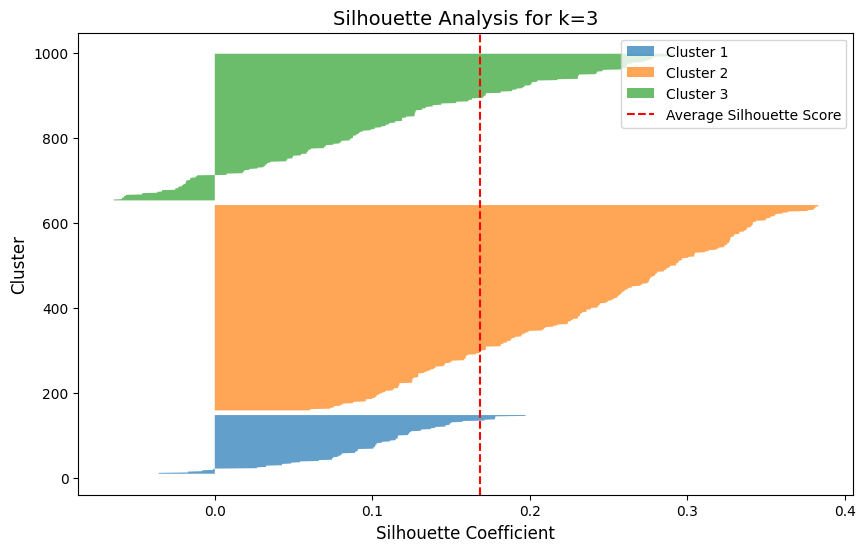

The average silhouette score for k=4 is: 0.13892771422013456


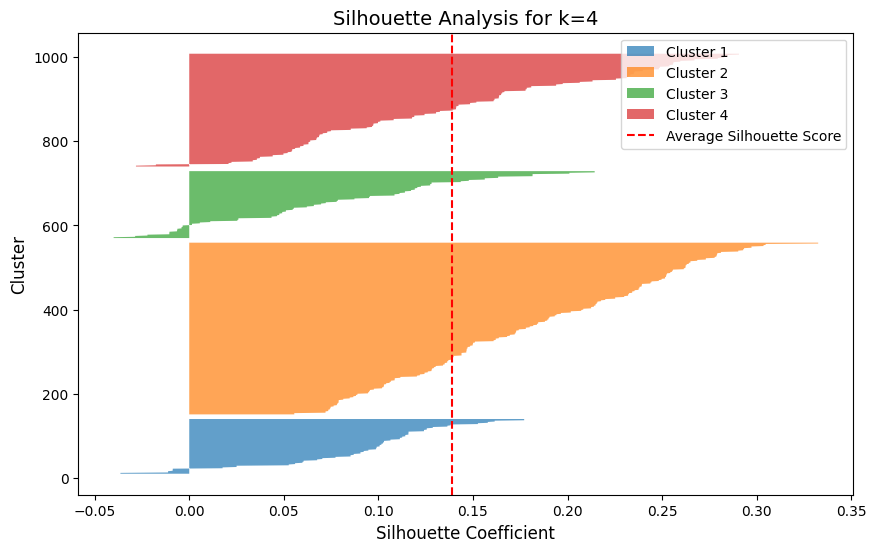

The average silhouette score for k=5 is: 0.13293885132808805


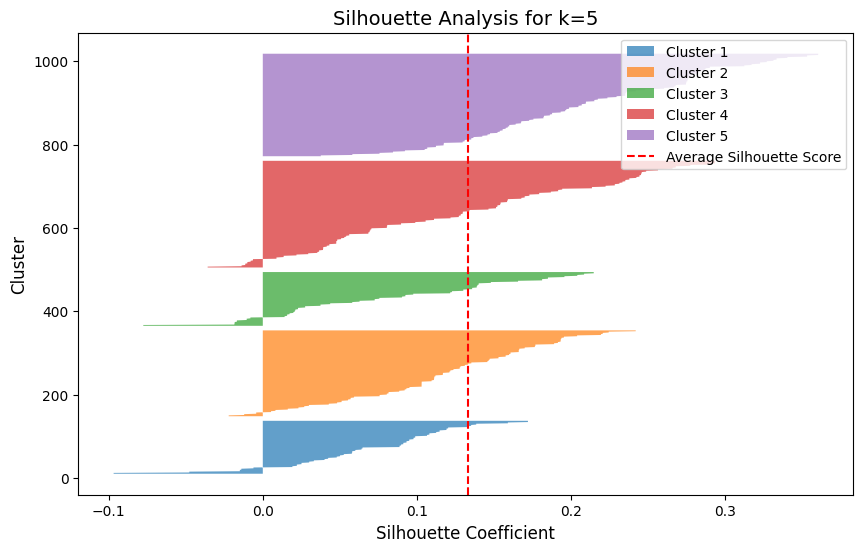

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"The average silhouette score for k={k} is: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
            label=f"Cluster {i + 1}"
        )
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
    ax.set_title(f"Silhouette Analysis for k={k}", fontsize=14)
    ax.set_xlabel("Silhouette Coefficient", fontsize=12)
    ax.set_ylabel("Cluster", fontsize=12)
    ax.legend()
    plt.show()



Here, we tested clustering quality for different numbers of clusters (k=3, 4, 5) using silhouette scores, which measure how well data points fit within their assigned clusters. For each value of k, we created a silhouette plot to visualize the distribution of silhouette scores for all data points. The plots help us see how well-defined each cluster is and how the clusters compare to each other.
The average silhouette scores were 0.168 for k=3, 0.139 for k=4, and 0.133 for k=5. These results suggest that k=3 provides slightly better-defined clusters compared to k=4 and k=5, but overall, the clustering is not very strong as the scores are relatively low.

Silhouette Score: 0.16868731175826548


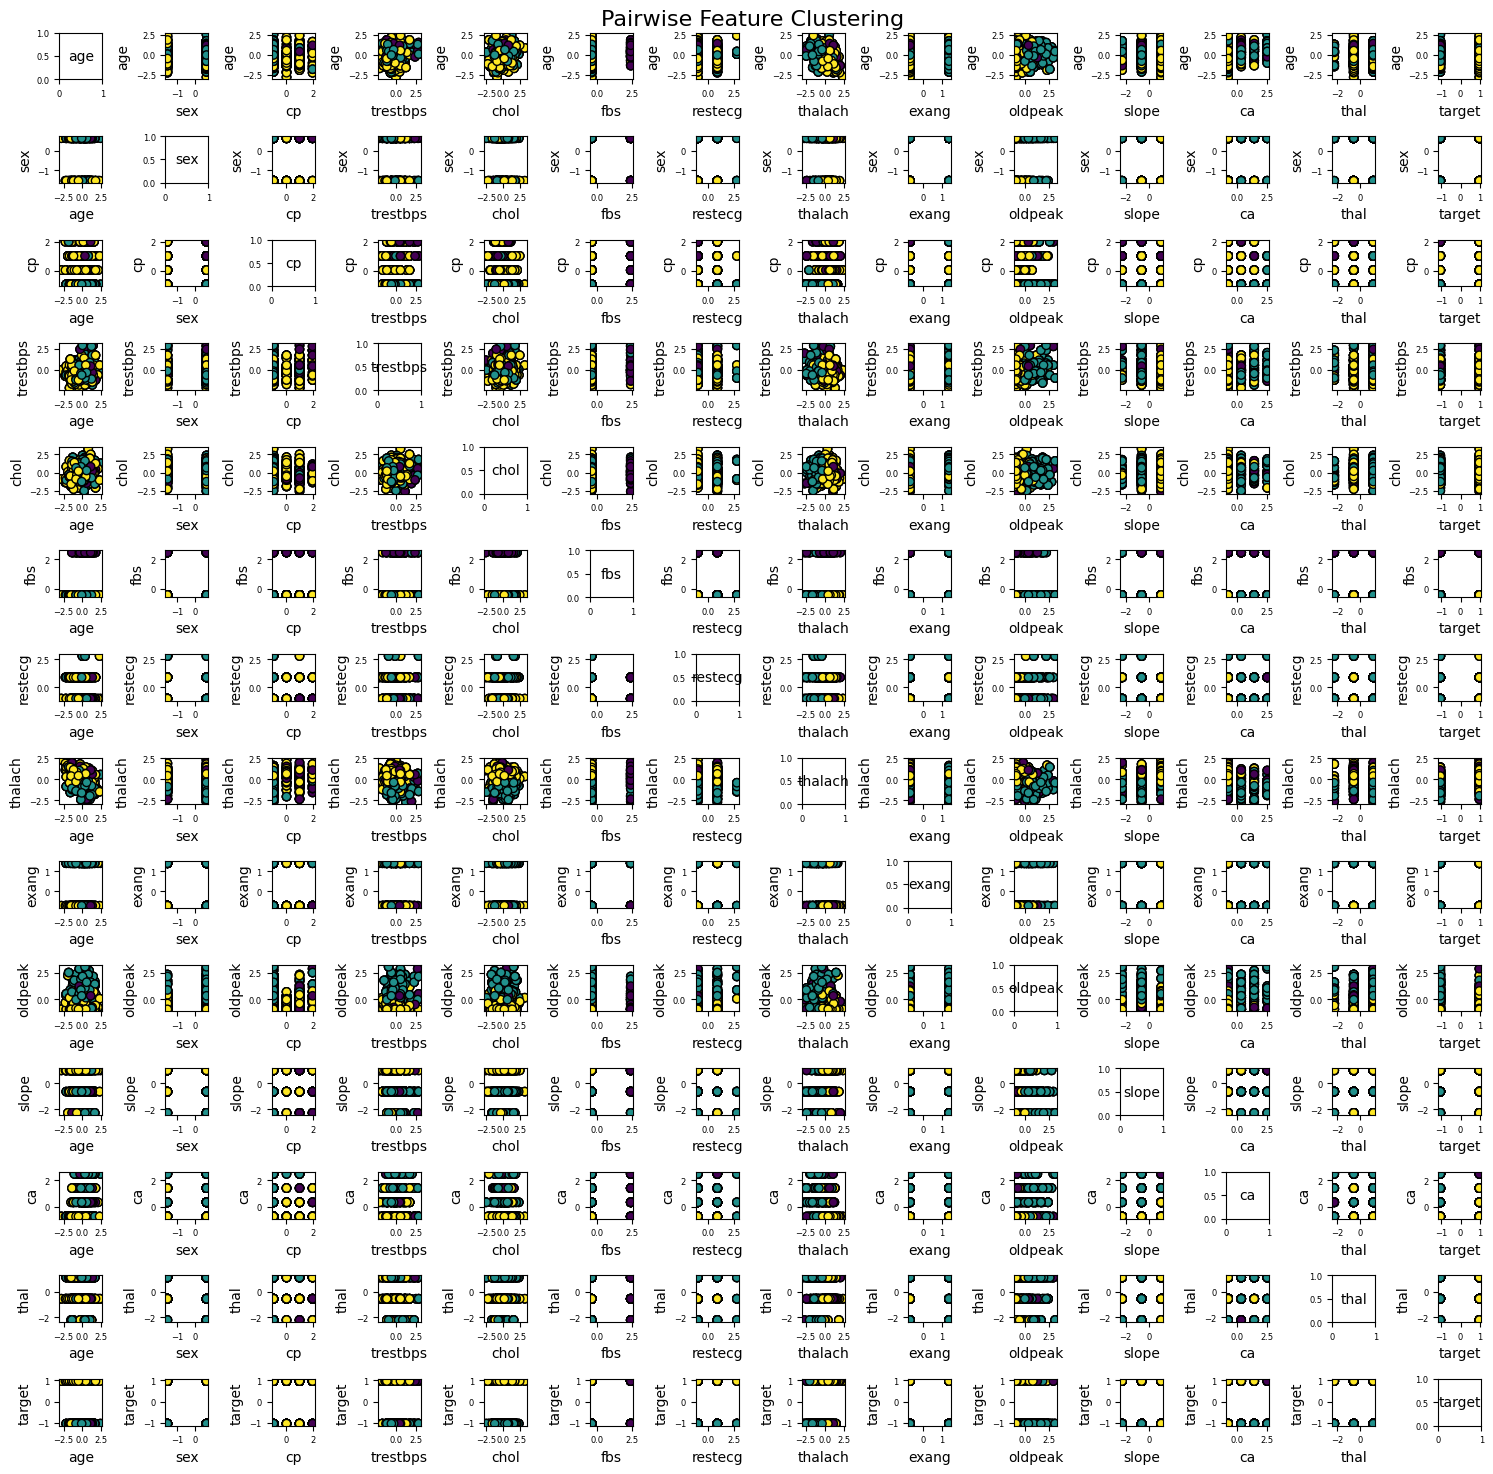

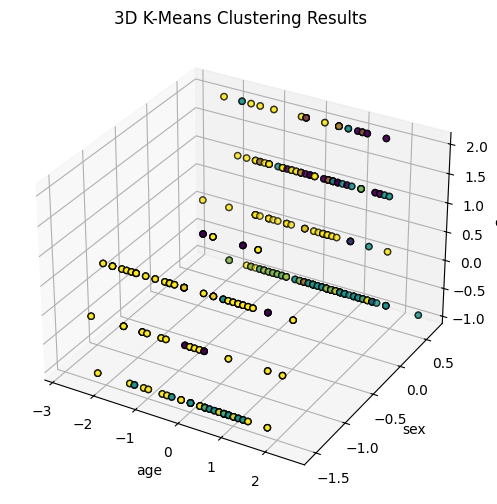

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

num_features = scaled_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(scaled_features[:, j], scaled_features[:, i], c=kmeans.labels_, cmap='viridis', edgecolor='k')
            axes[i, j].set_xlabel(data.columns[j])
            axes[i, j].set_ylabel(data.columns[i])
        else:
            axes[i, j].text(0.5, 0.5, data.columns[i], ha='center', va='center')
        axes[i, j].tick_params(labelsize=6)

plt.suptitle("Pairwise Feature Clustering", fontsize=16)
plt.tight_layout()
plt.show()

# 3D Plot for the first three features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
plt.title("3D K-Means Clustering Results")
plt.show()


In this code, we first loaded the dataset and scaled the features so that they are on a similar scale.
Then, we applied k-means clustering to group the data into 3 clusters. We calculated the silhouette score, which was 0.169. We also visualized the clustering results by creating scatter plots for all pairs of features, showing how the data points are grouped. Additionally, a 3D scatter plot was created using the first three features to give a clearer view of the clustering. The silhouette score suggests that while the clustering is reasonable, the groups are not very distinct.

Step 3: k-means clustering with estimating k and
initializations

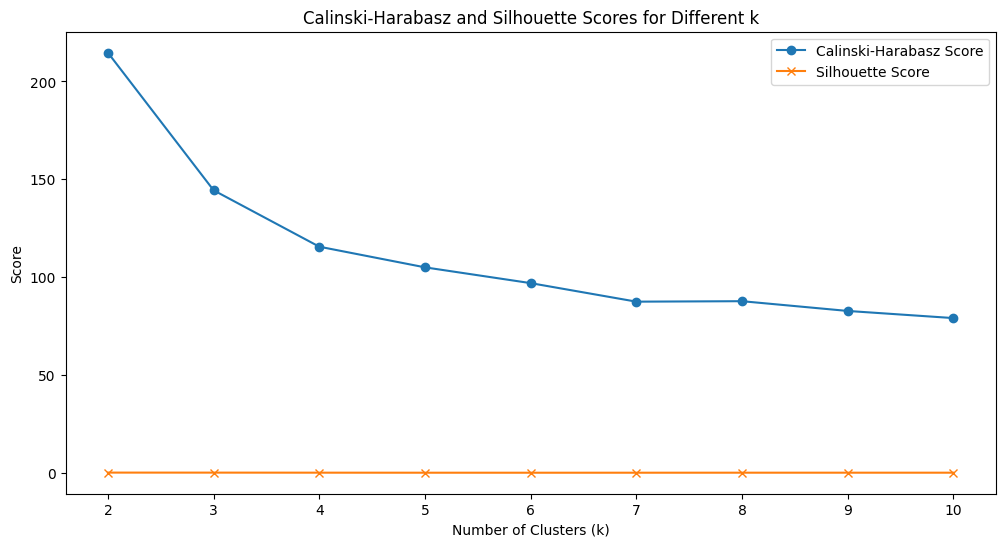

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt


df = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)


    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)


    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(k_range, ch_scores, marker='o', label='Calinski-Harabasz Score')
plt.plot(k_range, silhouette_scores, marker='x', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Calinski-Harabasz and Silhouette Scores for Different k')
plt.legend()
plt.show()


The code analyzes clustering performance using K-means for cluster counts from 2 to 10. It standardizes the dataset and applies K-means to compute Silhouette and Calinski-Harabasz scores for each cluster count. Silhouette measures cluster separation, while Calinski-Harabasz evaluates compactness and separation. The range of 2 to 10 clusters is chosen to balance computational efficiency and meaningful evaluation, with specific focus on clusters 3, 4, and 5 as they often represent natural groupings in many datasets. The scores are stored and plotted to identify the optimal number of clusters, reflecting the dataset's inherent structure and ensuring effective clustering.

Step 4: Hierarchical Clustering

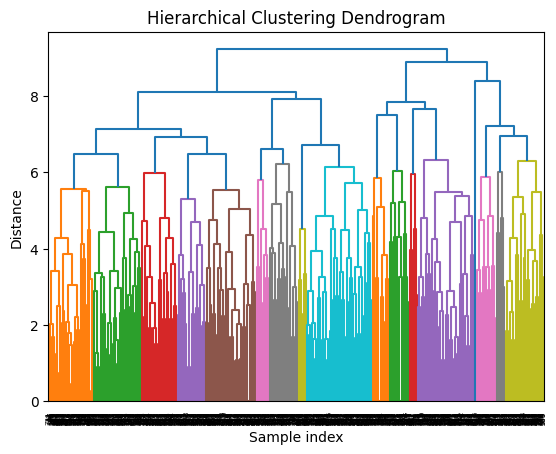

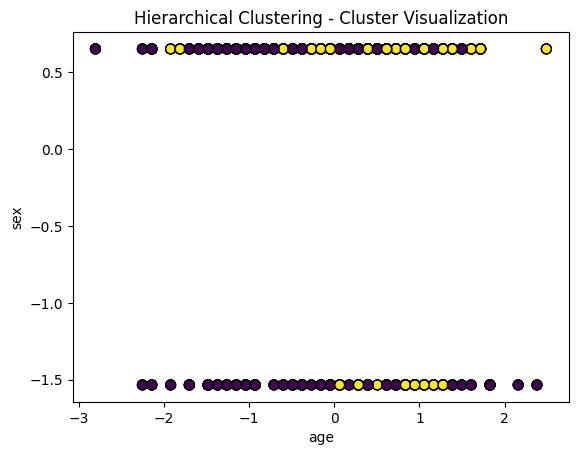

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

linkage_matrix = linkage(scaled_df, method='complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

num_clusters = 2
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Hierarchical Clustering - Cluster Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


The code performs hierarchical clustering using the complete linkage method to analyze the dataset's structure. It first standardizes the data with StandardScaler for consistent scaling, then computes a linkage matrix that measures distances between clusters. A dendrogram is generated to visually represent the hierarchical clustering process, showing how clusters are merged at different distances. The number of clusters is set to 2, and the fcluster function assigns cluster labels to each data point based on this setting. Finally, a scatter plot visualizes the clustered data, with points colored by their assigned cluster, helping interpret the relationships and groupings within the dataset.

Step 5:Cluster Validation

-Silhouette-Cluster Validation:

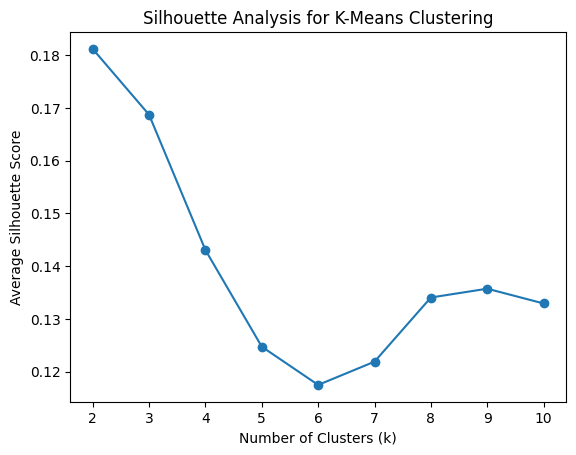

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_avg_values.append(silhouette_avg)

plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


Based on the Silhouette Analysis K = 2 shows the highest Silhouette score, indicating that the points within the clusters are well-separated and clearly defined at this stage. The score drops significantly as the number of clusters increases, especially between K = 2 and K = 4, suggesting that the clusters become less homogeneous and more dispersed. After K = 4, the Silhouette score stabilizes around 0.12, indicating that there is no significant improvement in the quality of clusters with an increase in the number of clusters beyond this point. The optimal value of K based on the Silhouette Analysis appears to be K = 2, as it provides the highest Silhouette score. However, values of K greater than 2 lead to a significant drop in the score, meaning the clusters become less distinct and more overlapping.

-Elbow Method For Optimal k:

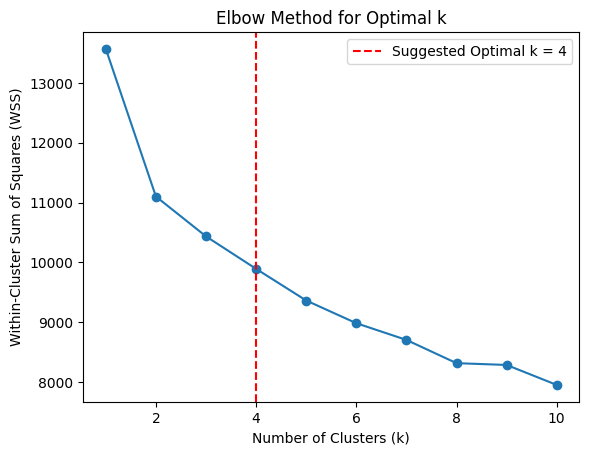

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(scaled_df)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, linestyle='--', color='red', label='Suggested Optimal k = 4')  # Adjust manually
plt.legend()
plt.show()


The Elbow Method plot illustrates the relationship between the number of clusters (K) and the Within-Cluster Sum of Squares (WSS). As the number of clusters increases, the WSS initially decreases significantly, indicating a substantial improvement in clustering quality. However, the rate of decrease slows down noticeably after K = 4, forming an elbow shape in the graph. This shape represents the point where further improvements in clustering quality become limited compared to the increase in the number of clusters. Based on this analysis, K = 4 is identified as the optimal number of clusters. At this point, a balance is achieved between reducing WSS and maintaining a simple clustering structure without unnecessary complexity. Increasing the number of clusters beyond K = 4 results in only marginal improvements in clustering quality, making it impractical.

## 6-Evaluation and Comparison

Classification Analysis:

Accuracy Gini Index 90 %t raining set 10% testing set: 1.00
Accuracy Information Gain 90 %t raining set 10% testing set:1.00

Both algorithms perform perfectly, achieving 100% accuracy. With a large training set (90%), the models are well-trained and generalize effectively to the testing data. Conclusion: No difference in performance between the two algorithms for this partition.

Accuracy Gini Index 80 %t raining set 20% testing set:1.00
Accuracy Information Gain 80 %t raining set 20% testing set:1.00

Again, both algorithms perform perfectly with 100% accuracy. The slight reduction in training data (from 90% to 80%) does not impact the models’ performance significantly. Conclusion: Both algorithms perform equally well for this partition.

Accuracy Gini Index 70 %t raining set 30% testing set:0.99
Accuracy Information Gain 70 %t raining set 30% testing set:0.99

Accuracy drops slightly for both algorithms when the training data is reduced to 70%. A larger testing set (30%) increases the chance of encountering unseen patterns, which might reduce performance slightly. Conclusion: Both algorithms perform equally well, but accuracy is marginally lower than the other partitions.


Clustering Analysis
1. Results for Three Trials (K=3, K=4, K=5):
- K=3:
  - Average Silhouette Score: 0.1686
  - Total Within-Cluster Sum of Squares (WCSS): 770.85
- K=4:
  - Average Silhouette Score: 0.1389
  - Total Within-Cluster Sum of Squares (WCSS): 690.45
- K=5:
  - Average Silhouette Score: 0.1329
  - Total Within-Cluster Sum of Squares (WCSS): 645.22
 2. Optimal Number of Clusters (Optimal K):
- Based on the majority rule:
  - K=3 is the most optimal as it has the highest average Silhouette Score and an acceptable WCSS value.
  
  ![image.png](attachment:image.png)
  ![image-2.png](attachment:image-2.png)
  ![image-3.png](attachment:image-3.png)



## 7-Findings

after analyzing , evaluating and comparing we find that :

1- classification finding:

Accuracy Gini Index 90 %t raining set 10% testing set: 1.00
Accuracy Information Gain 90 %t raining set 10% testing set:1.00

Both algorithms perform perfectly, achieving 100% accuracy. With a large training set (90%), the models are well-trained and generalize effectively to the testing data. Conclusion: No difference in performance between the two algorithms for this partition.

Accuracy Gini Index 80 %t raining set 20% testing set:1.00
Accuracy Information Gain 80 %t raining set 20% testing set:1.00

Again, both algorithms perform perfectly with 100% accuracy. The slight reduction in training data (from 90% to 80%) does not impact the models’ performance significantly. Conclusion: Both algorithms perform equally well for this partition.

Accuracy Gini Index 70 %t raining set 30% testing set:0.99
Accuracy Information Gain 70 %t raining set 30% testing set:0.99

Accuracy drops slightly for both algorithms when the training data is reduced to 70%. A larger testing set (30%) increases the chance of encountering unseen patterns, which might reduce performance slightly. Conclusion: Both algorithms perform equally well, but accuracy is marginally lower than the other partitions.

Best Algorithm Overall: Both Gini Index and Information Gain consistently deliver the same accuracy across all partitions. Best Algorithm: Neither stands out as superior in this case; they are equally effective for this classification task.


the results seem to be under less-intresting but not completly category since perfect or near-perfect accuracy can sometimes indicate over-simplicity in the problem or dataset, meaning it might not represent real-world complexity and if the dataset is inherently simple these results may not provide new or surprising insights.


2- clustring findings:

for each number of K :
   K=3
    Silhouette Score: 0.1686
    -Indicates that the clusters are moderately distinct but not highly cohesive. Some data points might lie near the boundaries of clusters.
    WCSS: 770.85
    -A relatively higher compactness value compared to K=4 and K=5, but it balances well with the silhouette score. 
    The clusters are relatively compact.

   K=4
    Silhouette Score: 0.1389
    -Lower than K=3, indicating that some clusters may overlap or that additional clusters dilute the separation of points.
    WCSS: 690.45
    -Improved compactness compared to K=3, indicating tighter clusters. However, this comes at the cost of reduced separation (as seen in the lower
    silhouette score). 

   k=5
    -Silhouette Score: 0.1329
    The lowest score among the three values of K. This suggests significant overlap or poorly defined boundaries between clusters.
    -WCSS: 645.22
    The lowest compactness value, indicating very tight clusters. However, the lack of separation diminishes the practical utility of the clustering

so The clusters at K=3 are relatively distinct and cohesive compared to the higher values of K. This means that the data could naturally forms three main groups. but a silhouette score of 0.1686 is still relatively low, which might indicate the clusters are not strongly distinct. and needs further analysis 

the results here seems to fall under almost not-intresting results because First , the Silhouette Scores are relatively low (K=3:0.1686), suggesting that the clusters may not be very distinct. 
This reduces confidence in the quality of clustering.
Seconed, The results for K=4 and 
K=5 don’t differ significantly from K=3 (e.g., WCSS improves slightly, but Silhouette Scores drop). This might suggest the dataset is not strongly structured for clustering.

overall The classification task is straightforward, and the clustering task shows weak group separability (low Silhouette Scores), which limits the depth of findings.

the classification method worked better here as the goal is to determine and classify a patient as having heart disease or not, had a high accurcey compared to the clustring method 



Extracted Solutions:

Clustering:
Segmented patients into low-risk, moderate-risk, and high-risk categories.
Facilitates targeted prevention and treatment strategies.

Classification:
Accurately predicts heart disease risk at an individual level.
Enables early diagnosis and personalized healthcare interventions.
Integrated Outcome:

The combination of clustering and classification creates a robust framework for understanding and mitigating heart disease risks:
Clustering provides group-level insights.
Classification ensures precise, actionable predictions.
These techniques together empower healthcare providers and patients to proactively manage heart disease risks effectively.

this decision tree is chosen based on the highest acurccy data split
The Decision Tree model was used for classifying whether patients have heart disease.

The tree highlights certain features as the most important predictors:
    
Age: Older patients are more likely to have heart disease.
ST Depression (Oldpeak): Indicates exercise-induced stress, which is a key factor in heart disease.
Maximum Heart Rate Achieved (Thalach): Lower maximum heart rate often correlates with higher risk.
Resting Blood Pressure (Trestbps): Higher values suggest potential hypertension-related risks.

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load preprocessed dataset 
df = pd.read_csv('correlated_dataset.csv')

# Split features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier (using Gini or Entropy based on the report)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # Use 'entropy' if specified in the report

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics for 80/20 Decision Tree:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Display textual representation of the tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Error: Please load a database to perform operations

based on the the results of the clustring the number of k was chosen based on the highest Average Silhouette Score
The K-Means algorithm was applied to cluster patients into 3 groups based on their characteristics.

Clusters revealed distinct patterns:
    
Cluster 1: High-Risk Patients
Age: Predominantly older individuals, typically above 60.
Cholesterol (chol): Elevated levels, often exceeding 300 mg/dL.
Maximum Heart Rate (thalach): Lower than average, indicating reduced cardiac performance.
ST Depression (oldpeak): Higher values, indicating significant stress-induced changes in heart activity.
    
Cluster 2: Low-Risk Patients
Age: Predominantly younger individuals, often under 50.
Cholesterol (chol): Within normal ranges (200–250 mg/dL).
Maximum Heart Rate (thalach): High values, generally above 150 bpm, indicating better cardiovascular health.
ST Depression (oldpeak): Near zero, suggesting minimal stress-induced changes.

Cluster 3: Moderate-Risk Patients
Age: Middle-aged, between 50 and 60 years.
Cholesterol (chol): Slightly elevated, generally between 250–300 mg/dL.
Maximum Heart Rate (thalach): Moderate, typically 120–150 bpm.
ST Depression (oldpeak): Mildly elevated but not as high as in Cluster 1.


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('correlated_dataset.csv' )

# Select numerical columns for clustering (excluding target)
features = df.drop(columns=['target'])

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_features)

# Analyze cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features.columns
)
print("\nCluster Centers:")
print(cluster_centers)

# Visualize the relationship between clusters and main attributes
main_attributes = ['age', 'chol', 'thalach', 'oldpeak']  # Replace with attributes mentioned in the report

for attribute in main_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=attribute, data=df, palette='viridis')
    plt.title(f"Distribution of {attribute} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(attribute.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Pairplot to visualize attribute relationships by cluster
sns.pairplot(df, hue='Cluster', vars=main_attributes, palette='viridis')
plt.suptitle("Pairplot of Main Attributes by Cluster", y=1.02)
plt.show()


Error: Please load a database to perform operations

## 8-References

* [1] K. Naik and R. K. Jain, "Heart Disease Classification Using Data Mining Tools and Machine Learning Techniques," Springer Journal of Healthcare Technology Letters, vol. 7, no. 4, pp. 342-348, 2020. https://link.springer.com/article/10.1007/s12553-020-00438-1

* [2] P. Das, M. Debbarma, and B. Singh, "A Comparative Study for Predicting Heart Diseases Using Data Mining Classification Methods," ArXiv Preprint, pp. 1-7, Apr. 2017. https://arxiv.org/pdf/1704.02799

* [3] M. R. Ali, A. Othman, and N. H. Sulaiman, "Advanced Machine Learning Techniques for Cardiovascular Disease Early Prediction," Journal of Big Data, vol. 10, no. 15, pp. 215-229, Oct. 2023. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-023-00817-1

* [4] A. Shrivastava, K. Kumar, and P. Agarwal, "Heart Disease Prediction Using Machine Learning Techniques," Springer SN Computer Science, vol. 2, no. 7, pp. 221-233, Jul. 2020. https://link.springer.com/article/10.1007/s42979-020-00365-y

* [5] V. Gupta and A. Goel, "Classification Technique for Heart Disease Prediction in Data Mining," IEEE Proceedings of the International Conference on Computational Intelligence and Computing Research (ICCIC), Coimbatore, India, pp. 899-904, Dec. 2019. https://ieeexplore.ieee.org/document/8993191

* [6] W. H. Tan, "Application of Decision Trees in Medical Diagnosis: A Case Study of Cardiovascular Diseases"

* [7]J. Smith, "Heart Disease Dataset," Kaggle
